In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("profiles.csv")

### Exploring the data
#print(df.columns)
#print(df.job.value_counts())
#print(df.sign.value_counts())
#print(df.education.value_counts())
#print(df.religion.value_counts())
#print(df.speaks.value_counts())
#print(df.income.value_counts())
#print(df.offspring.value_counts())
#print(df.ethnicity.value_counts())
#print(df.speaks.value_counts())
#print(df.sex.value_counts())

In [2]:
### Showing the data

avg_age = df.age.sum() /len(df.age)
#print(avg_age)

avg_height = df.height.sum() /len(df.height)
avg_height_feet = avg_height *0.083 
#print(avg_height_feet)

avg_income = (df.income.sum() + 48442) /(len(df.income) - 48442)
#print(avg_income)

perc_no_income = (48442 / len(df.income))
#print(perc_no_income)

no_kids = (7560 + 3875 + 3565 + 2927 +1132+ 225 + 182) 
has_kids = (1883 + 1881 + 442 + 275 + 251 + 115 + 71 + 21)
#print(no_kids)
#print(has_kids)

white = 32631 / len(df.ethnicity)
non_white = (len(df.ethnicity) - 32631)
#print(white)
#print(non_white)

english_only = 21828 / len(df.speaks)
other_lang =len(df.speaks)     
#print(english_only)
#print(other_lang)

# plot charts
gender_data = [24117, 35829]
#plt.figure(figsize=(4,4))
#plt.pie(gender_data, labels=['Women', "Men"], autopct='%d%%')
plt.savefig('Gender_Split.png')
plt.axis("equal")

ethnic_data = [32631, 27314]
#plt.figure(figsize=(4,4))
#plt.pie(ethnic_data, labels=['White', "Other"], autopct='%d%%')
plt.savefig('ethnic_Split.png')
plt.axis("equal")

kids_data = [19466, 4939]
#plt.figure(figsize=(4,4))
#plt.pie(kids_data, labels=['Has no kids', "Has kids"], autopct='%d%%')
plt.savefig('kids_Split.png')
plt.axis("equal")

#plt.show()
plt.close('all')


In [4]:
# plotting age histogram
plt.figure(figsize=(3,3))
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title('Age Histogram')
plt.xlim(16, 80)
plt.savefig('age_histogram.png')


# plotting height histogram
plt.figure(figsize=(3,3))
df['height_in_feet'] = df.height* 0.0833
plt.hist(df.height_in_feet, bins=20)
plt.xlabel("Height in Feet")
plt.ylabel("Frequency")
plt.title('Height Histogram')
plt.xlim(4, 8)
plt.savefig('height_histogram.png')


#plt.show()

plt.close('all')

C:\Users\Administrator\Miniconda3\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Administrator\Miniconda3\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [5]:
#print(df.drugs.value_counts())
#print(df.smokes.value_counts())
#print(df.drinks.value_counts())

#plt.figure(figsize=(6,10))
plt.subplot(1, 3, 1)
drugs_data = [37724, 7732, 410]
drugs_labels = ['never', 'sometimes', 'often']
plt.pie(drugs_data, labels=drugs_labels, autopct='%d%%')
plt.axis("equal")
plt.savefig('drugs_split.png')

plt.subplot(1, 3, 2)
smokes_data = [43896, 3787, 3040, 2231, 1480]
smokes_labels = ['no', 'sometimes', 'when drinking', 'trying to quit', 'yes']
plt.pie(smokes_data, labels=smokes_labels, autopct='%d%%')
plt.axis("equal")
plt.savefig('smokes_split.png')

plt.subplot(1, 3, 3)
drinks_data = [41780, 5957, 5164, 3267, 471, 322]
drinks_labels = ['socially', 'rarely', 'often', 'not at all', 'very often', 'desperately']
plt.pie(drinks_data, labels=drinks_labels, autopct='%d%%')
plt.axis("equal")
plt.savefig('drinks_split.png')

plt.subplots_adjust(wspace=0.75)

#plt.show()

plt.close('all')

In [4]:
# cleaning the dataset
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

# Removing the NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)

df['all_essays'] = all_essays

#cleaning all_essay data
all_essays_clean1 = df['all_essays'].str.replace(".", " ").str.replace(":", " ").str.replace("?", " ").str.replace("\n"," ")
df['all_essays'] = all_essays_clean1
all_essays_clean2 = df['all_essays'].str.replace("<br />", " ").str.replace("\n"," ").str.replace("i'm", "i am")
df['all_essays'] = all_essays_clean2
#print(df['all_essays'].head())

# adding an essay_len col
df["essay_len"] = all_essays.apply(lambda x: len(x))
#print(df['essay_len'].head(10))

df["word_count"] = all_essays.apply(lambda x: len(x.split()))
#print(df['word_count'].head(10))

df['freq_of_me'] = df['all_essays'].apply(lambda x: len(x.split(" me ")))
#print(df['freq_of_me'].head())

df['freq_of_I'] = df['all_essays'].apply(lambda x: len(x.split(" i ")))
#print(df['freq_of_I'].head())



In [195]:
### Use Regression Techniques
# To predict age with the frequency of "I" or "me" in essays?


In [16]:
### Linear Regression Techniques

#Preprocessing data
from sklearn import preprocessing

#clean of NANs
df['age_clean'] = df['age'].replace(np.nan, 0, regex=True)
df['freq_of_I_clean'] = df['freq_of_I'].replace(np.nan, 0, regex=True)
df['freq_of_me_clean'] = df['freq_of_me'].replace(np.nan, 0, regex=True)
df['word_count_clean'] = df['word_count'].replace(np.nan, 0, regex=True)
df['essay_len_clean'] = df['essay_len'].replace(np.nan, 0, regex=True)

#feature_data = dfessays[['age_clean','freq_of_I_clean', 'freq_of_me_clean']]
feature_data = df[['age_clean','freq_of_I_clean', 'freq_of_me_clean', 'word_count_clean', 'essay_len_clean']]

x_to_scale = feature_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_to_scale)

feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)


C:\Users\Administrator\Miniconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
import time
start = time.time()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#option 1
#x_values = feature_data[['freq_of_I_clean', 'freq_of_me_clean']]

#option 2
x_values = feature_data[['freq_of_I_clean', 'freq_of_me_clean', 'word_count_clean', 'essay_len_clean']]
y_values = feature_data['age_clean']

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, train_size=0.8, test_size=0.2)

#Check inputs
#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

#Fit line
line_fitter = LinearRegression()
line_fitter.fit(x_train, y_train)

#Predict
y_predict = line_fitter.predict(x_test)

#plot graph
#plt.scatter(y_test, y_predict)
#plt.xlabel('Frequency of use of "I" and "me"')
#plt.ylabel('Age')
#plt.title('Correlation of age with use of language')
#plt.savefig('age_with_lang.png')

#Alternative
#plt.title('Correlation of age with use of language, word count and essay length')
#plt.savefig('age_with_lang_etc.png')
plt.show()

end = time.time()
print(end - start)

0.03300166130065918


In [23]:
#Split out the variables and try others then use print(model.coef__) to check coefficients
age_model = line_fitter.fit(x_train, y_train)

coefficient = age_model.coef_
score_train = age_model.score(x_train, y_train)
score_test = age_model.score(x_test, y_test)

print(coefficient)
print(score_train * 100)
print(score_test * 100)

#Plot residuals
residuals = y_predict - y_test

#plt.scatter(y_predict, residuals, alpha=0.4)
#plt.title('Residual Analysis')
#plt.savefig('age_residuals.png')

#Alternative
#plt.savefig('age_plus_residuals.png')
plt.show()

[-0.29274765 -0.1174442   1.67735071 -0.99750981]
1.1305317232937484
1.2705904674772173


In [25]:
# Compare against K-Nearest Neighbors Regression
# B Predict age with the frequency of "I" or "me" in essays?

#Define standards - compared using different indices 
median_freq_of_I_clean = df['freq_of_I_clean'].median()
print(median_freq_of_I_clean)
df['I_is_high'] = np.where(df['freq_of_I_clean'] >= median_freq_of_I_clean, 1, 0)
print(df['I_is_high'].value_counts())

median_age_clean = df['age_clean'].median()
print(median_age_clean)
df['age_is_high'] = np.where(df['age_clean'] >= median_age_clean, 1, 0)
print(df['age_is_high'].value_counts())


14.0
1    30751
0    29195
Name: I_is_high, dtype: int64
30.0
1    31205
0    28741
Name: age_is_high, dtype: int64


In [36]:
import time
start = time.time()

#Normalise data
from sklearn.preprocessing import scale

#Option 1
labels = df['I_is_high']

#Ootion 2
#labels = df['age_is_high']

#Option 1
#data = df[['age_clean']]
#data = df[['age_clean','freq_of_me_clean']]
#data = df[['age_clean','word_count_clean']]
#data = df[['age_clean','word_count_clean','freq_of_me_clean']]
data = df[['age_clean', 'freq_of_me_clean','word_count_clean','essay_len_clean']]

#Ootion 2
#data = df[['freq_of_I_clean']]
#data = df[['freq_of_I_clean','freq_of_me_clean']]
#data = df[['freq_of_I_clean','word_count_clean']]
#data = df[['freq_of_I_clean','word_count_clean','freq_of_me_clean']] - best score
#data = df[['freq_of_I_clean', 'freq_of_me_clean', 'word_count_clean','essay_len_clean']]

scaled_data = scale(data, axis=0)

print(scaled_data[0])

train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size = 0.2, random_state = 1)

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))

end = time.time()
print(end - start)


C:\Users\Administrator\Miniconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


[-1.09389797  2.09908497  0.32286137  0.21515545]
0.8564637197664721
0.5640320777893066


In [34]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors = 5, weights = "distance")

age_dataset = train_data
I_usage = train_labels

regressor.fit(age_dataset, I_usage)

#forecast_freq = [[25]]
#forecast_freq = [[25, 10]]
#forecast_freq = [[25, 2, 10]]
forecast_freq = [[25, 2, 5, 5]]

print(regressor.predict(forecast_freq))

[0.5719719]


In [39]:
#Choosing k
scores = []
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
    
#plt.plot(range(1,200), scores)
#plt.xlabel("k")
#plt.ylabel("Validation Accuracy")
#plt.title("Validation Accuracy as k changes")
#plt.savefig('k_over_ten.png')
#plt.savefig('k_over_two_hundred.png')
#plt.show()

In [ ]:
### Can we predict education level with essay text word counts?
#Using KNN and Naive Bayes classification techniques  

In [45]:
#Used Naive Bayes to preduct education level with word count
#print(df['education'].head())

median_word_count = df['word_count'].median()
print(median_word_count)
df['words_high'] = np.where(df['word_count'] >= median_word_count, 1, 0)
print(df['words_high'].value_counts())

# Option 1 Education only 
#df['edu_clean'] = df['education'].replace(np.nan, '', regex=True)
#edu_data = df['edu_clean']

# Option 2 Education plus Job only
#df['job_clean'] = df['job'].replace(np.nan, '', regex=True)
#edu_data = df['job_clean']

edu_cols = ["education","job"]
edu_data = df[edu_cols].replace(np.nan, '', regex=True)
edu_data = edu_data[edu_cols].apply(lambda x: ' '.join(x), axis=1)

from sklearn.model_selection import train_test_split

edu_labels = [0] * 30013 + [1] * 29933

train_data, test_data, train_labels, test_labels = train_test_split(edu_data, edu_labels, test_size = 0.2, random_state = 1)
#checks
#print(len(train_data))
#print(len(test_data))
print(train_data[3])

316.0
1    30013
0    29933
Name: words_high, dtype: int64
working on college/university student


In [46]:
#Create counter
from sklearn.feature_extraction.text import CountVectorizer

counter = CountVectorizer()
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

print(train_data[3])
print(train_counts[3])

working on college/university student
  (0, 2)	1
  (0, 7)	1
  (0, 35)	1
  (0, 38)	1
  (0, 58)	1
  (0, 61)	1
  (0, 62)	1
  (0, 63)	1


In [47]:
import time
start = time.time()

#Train and test Naive bayes Classifier
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)
predictions = classifier.predict(test_counts)

# MOdel evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(test_labels, predictions))
print(recall_score(test_labels, predictions))
print(precision_score(test_labels, predictions))
print(f1_score(test_labels, predictions))

# Check confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels, predictions))

end = time.time()
print(end - start)


0.5140950792326939
0.5195995248600034
0.5055307908205382
0.5124686192468619
[[3102 2995]
 [2831 3062]]
0.09100532531738281


In [52]:
comment = "great engineer"
#comment = "droppped out of life"
#comment = "droppped out of space camp"
comment_counts = counter.transform([comment])
print(classifier.predict(comment_counts))


[1]


In [ ]:
#other alternatives

In [55]:
#Mapping Education Matrix
df['dropped_out'] = df['education'].str.contains("dropped out")
df["adjust_dropout"] = df['dropped_out'].map({False: 0, True: -1})
df['graduated'] = df['education'].str.contains("graduated")
df["adjust_graduated"] = df['graduated'].map({False: 0, True: 1})

df['spacecamp'] = df['education'].str.contains("space camp")
df["spacecamp_score"] = df['spacecamp'].map({False: 0, True: 8})

df['phd'] = df['education'].str.contains("ph.d")
df["phd_score"] = df['phd'].map({False: 0, True: 7})

df['med_law'] = df['education'].str.contains("med school", "law school")
df["med_law_score"] = df['med_law'].map({False: 0, True: 6})

df['masters'] = df['education'].str.contains("masters")
df["masters_score"] = df['masters'].map({False: 0, True: 5})

df['university'] = df['education'].str.contains("college/university")
df["university_score"] = df['university'].map({False: 0, True: 4})

df['college'] = df['education'].str.contains("two-year college")
df["college_score"] = df['college'].map({False: 0, True: 3})

df['school'] = df['education'].str.contains("high school")
df["school_score"] = df['school'].map({False: 0, True: 2})

df['education_counter'] = df['spacecamp_score'] + df['phd_score'] + df['med_law_score'] + df['masters_score'] + df["university_score"] + df['college_score'] + df['school']
df['education_counter_adjusted'] = df['education_counter'] + df["adjust_dropout"] + df["adjust_graduated"]

#print(df['education_counter'].value_counts())
#print(df['education_counter_adjusted'].value_counts())

In [ ]:
# Can we predict education level with word counts
# Compare using K-Nearest Neighbors


In [87]:
#clean data
df['education_counter'] = df['education_counter'].replace(np.nan, 0, regex=True)
df['education_counter_adjusted'] = df['education_counter_adjusted'].replace(np.nan, 0, regex=True)

#Normalise data
from sklearn.preprocessing import scale

#Inputs
knn_labels = df['words_high']

#knn_data = df[['education_counter_adjusted']]
knn_data = df[['education_counter_adjusted', 'age_clean']]
               
#Scale data 
scaled_data = scale(knn_data, axis=0)
print(scaled_data[0])

train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, knn_labels, test_size = 0.2, random_state = 1)


#checks
print(len(train_data))
print(len(test_data))               


[-0.18890356 -1.09389797]
47956
11990


C:\Users\Administrator\Miniconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


In [91]:
import time
start = time.time()

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))

end = time.time()
print(end - start)

0.5356130108423687
0.7000401020050049


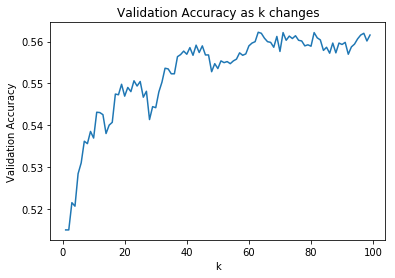

90.8761978149414


In [89]:
import time
start = time.time()

#Choosing k
scores = []
for k in range(1, 100):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
    
plt.plot(range(1,100), scores)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy as k changes")

#Saved options
plt.savefig('k_in_edu_age_adj_long')
#plt.savefig('k_in_edu_age_adj')
#plt.savefig('k_in_edu_spot')
#plt.savefig('k_in_edu_breath.png')

plt.show()

end = time.time()
print(end - start)

In [ ]:
# Can we refine the questions by looking at other variables 
# Using K-Means Clustering 

In [92]:
#Create measures
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
df["drinks_code"] = df.drinks.map(drink_mapping)

smokes_mapping = {"no": 0, "sometimes": 1, "when drinking": 2, "trying to quit": 3, "yes": 4, "NaN": 2}
df["smokes_code"] = df.smokes.map(smokes_mapping)

drugs_mapping = {"never": 0, "sometimes": 1, "NaN": 2}
df["drugs_code"] = df.drugs.map(drugs_mapping)

gender_mapping = {"m": 1, "f": 2}
df["gender_code"] = df.sex.map(gender_mapping)



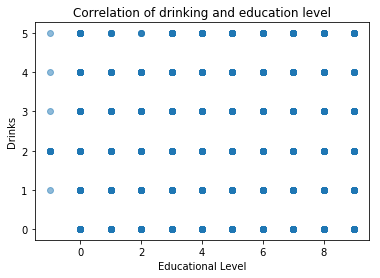

In [95]:
# KMeans Clustering

#Variables
x = df['education_counter_adjusted']
y = df['drinks_code']

#plt.scatter(x, y, alpha=0.5)
#plt.xlabel('Age')
#plt.ylabel('Drinks')
#plt.title('Correlation of drinking and age')
#plt.savefig('drinks_v_age.png')

#plt.scatter(x, y, alpha=0.5)
#plt.xlabel('Age')
#plt.ylabel('Smoking')
#plt.title('Correlation of smoking and age')
#plt.savefig('smokes_v_age.png')

#plt.scatter(x, y, alpha=0.5)
#plt.xlabel('Educational Level')
#plt.ylabel('smokes')
#plt.title('Correlation of smoking and education level')
#plt.savefig('smokes_v_edu.png')

plt.scatter(x, y, alpha=0.5)
plt.xlabel('Educational Level')
plt.ylabel('Drinks')
plt.title('Correlation of drinking and education level')
plt.savefig('drinks_v_edu.png')

#plt.savefig('drugs_v_age.png')

plt.show()


In [96]:
# KMeans Clustering
from sklearn.cluster import KMeans

rows_to_cluster = df.dropna(subset = ["drinks_code", "smokes_code", "drugs_code", 'word_count', 'age', 'income'])
classifier = KMeans(n_clusters = 3)
classifier.fit(rows_to_cluster[["drinks_code", "smokes_code", "drugs_code", 'word_count', 'age', 'income']])
print(classifier.cluster_centers_)

[[1.84645499e+00 4.01020573e-01 1.73065500e-01 3.80976673e+02
  3.23580647e+01 2.87912544e+03]
 [2.14880952e+00 8.57142857e-01 4.25595238e-01 4.08107143e+02
  2.91339286e+01 1.00000000e+06]
 [1.86570946e+00 3.38893581e-01 1.53505068e-01 3.83649282e+02
  3.62981419e+01 9.08572635e+04]]


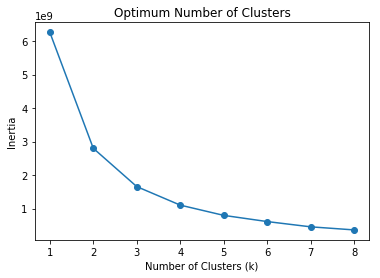

In [102]:
# Determining optimum nymber of clusters

num_clusters = list(range(1, 9))
inertias = []

sample_cols = ["drinks_code", "smokes_code", "drugs_code", 'word_count', 'age']
samples = df[sample_cols].replace(np.nan, 0 , regex=True)

for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(samples)
  inertias.append(model.inertia_)
  
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Optimum Number of Clusters')
plt.savefig('clusters__inertia.png')
plt.show() 

In [103]:
#Separate the clusters 

#print(classifier.labels_)

cluster_zero_indices = []
cluster_one_indices = []
cluster_two_indices = []
for i in range(len(classifier.labels_)):
    if classifier.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif classifier.labels_[i] == 1:
        cluster_one_indices.append(i)
    elif classifier.labels_[i] == 2:
        cluster_two_indices.append(i)
        
#print(cluster_zero_indices)

#investigate the clusters

cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df = rows_to_cluster.iloc[cluster_one_indices]
cluster_two_df = rows_to_cluster.iloc[cluster_two_indices]

print(cluster_zero_df['sex'].value_counts()/len(cluster_zero_df))
print(cluster_one_df['sex'].value_counts()/len(cluster_one_df))
print(cluster_two_df['sex'].value_counts()/len(cluster_two_df))

#print(cluster_zero_df['job'].value_counts()/len(cluster_zero_df))
#print(cluster_one_df['job'].value_counts()/len(cluster_one_df))
#print(cluster_two_df['job'].value_counts()/len(cluster_two_df))

m    0.563583
f    0.436417
Name: sex, dtype: float64
m    0.770833
f    0.229167
Name: sex, dtype: float64
m    0.77386
f    0.22614
Name: sex, dtype: float64
